## Exploring The Telenor Telco Dataset

In [4]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from datetime import datetime
from sklearn.metrics import f1_score, precision_score, recall_score
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import seaborn as sns
import cufflinks as cf
import glob
import sys
import json
from tqdm.notebook import tqdm
cf.go_offline()
init_notebook_mode


<function plotly.offline.offline.init_notebook_mode(connected=False)>

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Loading the data

In [6]:
data_path = '../../Data/Data_DK/radio_kpis_sample.csv'
#data_path = '../../Hackathon2021_Telenor/hackathon_kpis_anonymised.csv'
df = pd.read_csv(data_path, sep=";")
df_orig = df.copy()

In [7]:
df_orig.head()

gid   site    sector cell_name              period_start_time  \
0    1638078  J3484  J3484Lx1  J3484L11  2020-09-09T15:00:00.000+02:00   
1  102436373  J0614  J0614Lx3  J0614L13  2020-04-13T11:00:00.000+02:00   
2    1638082  J3484  J3484Lx3  J3484L23  2020-08-24T19:00:00.000+02:00   
3   84392868  J0847  J0847Tx3  J0847T13  2020-06-22T07:00:00.000+02:00   
4   84461202  J3669  J3669Ax3  J3669A13  2020-08-26T21:00:00.000+02:00   

   day_partition_key  cell_hour tech  avail_period_duration  \
0           20200909         15   4G                     60   
1           20200413         11   4G                     60   
2           20200824         19   4G                     60   
3           20200622          7   4G                     60   
4           20200826         21   4G                     60   

   unavail_unplan_nom  ...  mcdr_denom  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
0                 0.0  ...       120.0         0.0         0.0      6960.0   
1                 0.0  ...        19.0         0.0         0.0      2956.0   
2                 0.0  ...         6.0         0.0         0.0      1029.0   
3                 0.0  ...        10.0         0.0         0.0      2148.0   
4                 0.0  ...         3.0         0.0         0.0       367.0   

   msdr_nom_s  msdr_nom_d    thp_denom_tt_kpi          thp_nom_tt_kpi  \
0         1.0         0.0  2078735.4000000000  23654481152.0000000000   
1         0.0         0.0   861115.6200000000  12128489808.0000000000   
2         0.0         0.0   158804.6950000000   3447064976.0000000000   
3         1.0         2.0  1254287.8500000000  13956711880.0000000000   
4         0.0         0.0  1174901.2200000000  18573615952.0000000000   

   ho_denom  ho_nom  
0     291.0     1.0  
1     251.0     0.0  
2      69.0     0.0  
3     210.0     2.0  
4      39.0     0.0  

[5 rows x 24 columns]

### Some info
From below we see that we have 1048575 rows of data, each with 24 columns. 

In [8]:
print(df.shape)
df.head()

(1048575, 24)


gid   site    sector cell_name              period_start_time  \
0    1638078  J3484  J3484Lx1  J3484L11  2020-09-09T15:00:00.000+02:00   
1  102436373  J0614  J0614Lx3  J0614L13  2020-04-13T11:00:00.000+02:00   
2    1638082  J3484  J3484Lx3  J3484L23  2020-08-24T19:00:00.000+02:00   
3   84392868  J0847  J0847Tx3  J0847T13  2020-06-22T07:00:00.000+02:00   
4   84461202  J3669  J3669Ax3  J3669A13  2020-08-26T21:00:00.000+02:00   

   day_partition_key  cell_hour tech  avail_period_duration  \
0           20200909         15   4G                     60   
1           20200413         11   4G                     60   
2           20200824         19   4G                     60   
3           20200622          7   4G                     60   
4           20200826         21   4G                     60   

   unavail_unplan_nom  ...  mcdr_denom  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
0                 0.0  ...       120.0         0.0         0.0      6960.0   
1                 0.0  ...        19.0         0.0         0.0      2956.0   
2                 0.0  ...         6.0         0.0         0.0      1029.0   
3                 0.0  ...        10.0         0.0         0.0      2148.0   
4                 0.0  ...         3.0         0.0         0.0       367.0   

   msdr_nom_s  msdr_nom_d    thp_denom_tt_kpi          thp_nom_tt_kpi  \
0         1.0         0.0  2078735.4000000000  23654481152.0000000000   
1         0.0         0.0   861115.6200000000  12128489808.0000000000   
2         0.0         0.0   158804.6950000000   3447064976.0000000000   
3         1.0         2.0  1254287.8500000000  13956711880.0000000000   
4         0.0         0.0  1174901.2200000000  18573615952.0000000000   

   ho_denom  ho_nom  
0     291.0     1.0  
1     251.0     0.0  
2      69.0     0.0  
3     210.0     2.0  
4      39.0     0.0  

[5 rows x 24 columns]

In [9]:
df.describe()

gid  day_partition_key     cell_hour  avail_period_duration  \
count  1.048575e+06       1.048575e+06  1.048575e+06           1.048575e+06   
mean   2.904298e+07       2.020070e+07  1.065358e+01           5.996001e+01   
std    3.641083e+07       3.544729e+02  6.999150e+00           1.167326e+00   
min    1.009210e+05       2.020010e+07  0.000000e+00           1.000000e+00   
25%    1.999919e+06       2.020041e+07  4.000000e+00           6.000000e+01   
50%    5.809329e+06       2.020071e+07  1.000000e+01           6.000000e+01   
75%    8.431320e+07       2.020102e+07  1.700000e+01           6.000000e+01   
max    1.327399e+08       2.020122e+07  2.300000e+01           6.000000e+01   

       unavail_unplan_nom  unavail_unplan_denom  unavail_total_nom  \
count       987629.000000         987629.000000      987629.000000   
mean             0.824857             58.760608           8.382773   
std              6.961787              8.407114          20.674759   
min              0.000000              0.000000         -59.950000   
25%              0.000000             60.000000           0.000000   
50%              0.000000             60.000000           0.000000   
75%              0.000000             60.000000           0.000000   
max             60.016667            119.950000         120.000000   

       unavail_total_denom     bandwidth     mcdr_denom     mcdr_nom_s  \
count        987629.000000  1.048201e+06  785852.000000  785852.000000   
mean             59.689477  7.562750e+01      12.841702       0.009717   
std               4.058735  7.302983e+01      29.337983       0.150289   
min               0.166667  1.000000e-01       0.000000      -1.000000   
25%              60.000000  2.000000e+01       0.000000       0.000000   
50%              60.000000  5.000000e+01       2.000000       0.000000   
75%              60.000000  1.000000e+02      12.000000       0.000000   
max              60.283333  2.000000e+02     749.000000      53.000000   

          mcdr_nom_d     msdr_denom     msdr_nom_s     msdr_nom_d  \
count  938574.000000  785388.000000  785388.000000  768268.000000   
mean        0.013554    1522.674293       2.220355       4.983070   
std         0.143809    2845.253786       9.074972      24.270503   
min        -4.000000       0.000000      -3.000000      -8.000000   
25%         0.000000     169.000000       0.000000       0.000000   
50%         0.000000     552.500000       0.000000       0.000000   
75%         0.000000    1645.000000       1.000000       2.000000   
max        16.000000   54133.000000    1151.000000    3455.000000   

            ho_denom         ho_nom  
count  668063.000000  668063.000000  
mean       61.636004       1.296872  
std       165.533193      36.391507  
min         0.000000      -1.000000  
25%         0.000000       0.000000  
50%         2.000000       0.000000  
75%        48.000000       0.000000  
max      6552.000000    2579.000000

### Print number of nans for each column

In [10]:
nan_values = df.isna().sum()
print(nan_values)
nan_columns = nan_values[nan_values > 0].index.tolist()
nan_columns

gid                           0
site                          0
sector                        0
cell_name                     0
period_start_time             0
day_partition_key             0
cell_hour                     0
tech                          0
avail_period_duration         0
unavail_unplan_nom        60946
unavail_unplan_denom      60946
unavail_total_nom         60946
unavail_total_denom       60946
bandwidth                   374
mcdr_denom               262723
mcdr_nom_s               262723
mcdr_nom_d               110001
msdr_denom               263187
msdr_nom_s               263187
msdr_nom_d               280307
thp_denom_tt_kpi          94177
thp_nom_tt_kpi            94177
ho_denom                 380512
ho_nom                   380512
dtype: int64


['unavail_unplan_nom',
 'unavail_unplan_denom',
 'unavail_total_nom',
 'unavail_total_denom',
 'bandwidth',
 'mcdr_denom',
 'mcdr_nom_s',
 'mcdr_nom_d',
 'msdr_denom',
 'msdr_nom_s',
 'msdr_nom_d',
 'thp_denom_tt_kpi',
 'thp_nom_tt_kpi',
 'ho_denom',
 'ho_nom']

In [11]:
df2 = df[df['tech'] == '2G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.000000
unavail_unplan_denom     0.000000
unavail_total_nom        0.000000
unavail_total_denom      0.000000
bandwidth                0.000000
mcdr_denom               0.000000
mcdr_nom_s               0.000000
mcdr_nom_d               0.000000
msdr_denom               0.000000
msdr_nom_s               0.000000
msdr_nom_d               0.230131
thp_denom_tt_kpi         0.000000
thp_nom_tt_kpi           0.000000
ho_denom                 0.471454
ho_nom                   0.471454
dtype: float64

In [12]:
df2 = df[df['tech'] == '3G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.000000
unavail_unplan_denom     0.000000
unavail_total_nom        0.000000
unavail_total_denom      0.000000
bandwidth                0.000834
mcdr_denom               0.245217
mcdr_nom_s               0.245217
mcdr_nom_d               0.245217
msdr_denom               0.246875
msdr_nom_s               0.246875
msdr_nom_d               0.246875
thp_denom_tt_kpi         0.000000
thp_nom_tt_kpi           0.000000
ho_denom                 0.429123
ho_nom                   0.429123
dtype: float64

In [13]:
df2 = df[df['tech'] == '4G']
nan_values = df2.isna().sum()
nan_values / df2.shape[0]

gid                      0.000000
site                     0.000000
sector                   0.000000
cell_name                0.000000
period_start_time        0.000000
day_partition_key        0.000000
cell_hour                0.000000
tech                     0.000000
avail_period_duration    0.000000
unavail_unplan_nom       0.116161
unavail_unplan_denom     0.116161
unavail_total_nom        0.116161
unavail_total_denom      0.116161
bandwidth                0.000000
mcdr_denom               0.291082
mcdr_nom_s               0.291082
mcdr_nom_d               0.000000
msdr_denom               0.290548
msdr_nom_s               0.290548
msdr_nom_d               0.290142
thp_denom_tt_kpi         0.179498
thp_nom_tt_kpi           0.179498
ho_denom                 0.290667
ho_nom                   0.290667
dtype: float64

In [14]:
# Removing data for a TEST cell 
df = df[df['cell_name'] != 'J5002D11_TEST']

# Remove 2G cells (for now)
df = df[df['tech'] != '2G']

# Some rows have columns with values -1, removing those rows
# columns with some -1 values:
# mcdr_nom_s, msdr_nom_s, msdr_nom_d, ho_nom
for c in ['mcdr_nom_s', 'msdr_nom_s', 'msdr_nom_d', 'ho_nom']:
    df = df[df[c] != -1]

# Converting a OBJECT column to FLOAT
df['thp_nom_tt_kpi'].replace('0,00E+00', 0.0, inplace=True)
df['thp_denom_tt_kpi'].replace('0,00E+00', 0.0, inplace=True)

df['thp_nom_tt_kpi'] = df['thp_nom_tt_kpi'].astype(float)
df['thp_denom_tt_kpi'] = df['thp_denom_tt_kpi'].astype(float)

# Change sector values and carrier
df['sector'] = df['sector'].apply(lambda l: int(l[-1]))
df['cell_name'] = df['cell_name'].apply(lambda l: int(l[-2]))
df = df.rename(columns={'cell_name': 'carrier'})


In [15]:
#df['timestamp'] = df['period_start_time'].apply(lambda l: str(l[:10]) + ' ' + str(l[11:19]))
df['day_partition_key'] = df['day_partition_key'].astype(str)
df['cell_hour'] = df['cell_hour'].astype(str)
#df['cell_hour'] = df['cell_hour'].apply(lambda l: '0' + l if len(l) == 1 else l)

df['timestamp'] = df['day_partition_key'] + df['cell_hour']
df.head()

gid   site  sector  carrier              period_start_time  \
0    1638078  J3484       1        1  2020-09-09T15:00:00.000+02:00   
1  102436373  J0614       3        1  2020-04-13T11:00:00.000+02:00   
2    1638082  J3484       3        2  2020-08-24T19:00:00.000+02:00   
3   84392868  J0847       3        1  2020-06-22T07:00:00.000+02:00   
4   84461202  J3669       3        1  2020-08-26T21:00:00.000+02:00   

  day_partition_key cell_hour tech  avail_period_duration  unavail_unplan_nom  \
0          20200909        15   4G                     60                 0.0   
1          20200413        11   4G                     60                 0.0   
2          20200824        19   4G                     60                 0.0   
3          20200622         7   4G                     60                 0.0   
4          20200826        21   4G                     60                 0.0   

   ...  mcdr_nom_s  mcdr_nom_d  msdr_denom  msdr_nom_s  msdr_nom_d  \
0  ...         0.0         0.0      6960.0         1.0         0.0   
1  ...         0.0         0.0      2956.0         0.0         0.0   
2  ...         0.0         0.0      1029.0         0.0         0.0   
3  ...         0.0         0.0      2148.0         1.0         2.0   
4  ...         0.0         0.0       367.0         0.0         0.0   

   thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom   timestamp  
0       2078735.400    2.365448e+10     291.0     1.0  2020090915  
1        861115.620    1.212849e+10     251.0     0.0  2020041311  
2        158804.695    3.447065e+09      69.0     0.0  2020082419  
3       1254287.850    1.395671e+10     210.0     2.0   202006227  
4       1174901.220    1.857362e+10      39.0     0.0  2020082621  

[5 rows x 25 columns]

### Sorting data after timestamp

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
df = df.sort_values(by=['timestamp'])
df.tail()

gid   site  sector  carrier              period_start_time  \
465665  85089991  J0959       3        1  2020-12-21T07:00:00.000+01:00   
465515   5364976  J4521       1        2  2020-12-21T07:00:00.000+01:00   
117462  51440591  J4024       3        1  2020-12-21T07:00:00.000+01:00   
410504   1638106  J3484       3        1  2020-12-21T07:00:00.000+01:00   
256752  28221273  J5003       3        1  2020-12-21T07:00:00.000+01:00   

       day_partition_key cell_hour tech  avail_period_duration  \
465665          20201221         7   4G                     60   
465515          20201221         7   4G                     60   
117462          20201221         7   4G                     60   
410504          20201221         7   4G                     60   
256752          20201221         7   4G                     60   

        unavail_unplan_nom  ...  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
465665                 0.0  ...         NaN         0.0       453.0   
465515                 0.0  ...         NaN         0.0       446.0   
117462                 0.0  ...         NaN         0.0      2195.0   
410504                 0.0  ...         NaN         0.0      1282.0   
256752                60.0  ...         NaN         0.0         NaN   

        msdr_nom_s  msdr_nom_d  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  \
465665         0.0         0.0         126647.77    1.991902e+09       NaN   
465515         0.0         0.0         255674.22    3.419708e+08       NaN   
117462         7.0         0.0        2341858.49    3.105091e+10       NaN   
410504         1.0         0.0         222070.99    3.915706e+09       NaN   
256752         NaN         NaN               NaN             NaN       NaN   

        ho_nom           timestamp  
465665     NaN 2020-12-21 07:00:00  
465515     NaN 2020-12-21 07:00:00  
117462     NaN 2020-12-21 07:00:00  
410504     NaN 2020-12-21 07:00:00  
256752     NaN 2020-12-21 07:00:00  

[5 rows x 25 columns]

### Checking the resolution 
From below we see that it is hourly, and only once is there a gap of more than an hour (2020-03-29).

In [17]:
grouped_df = df.groupby(['timestamp'])

for timestamp, group in grouped_df:
    t = timestamp
    break

for timestamp, group in grouped_df:
    next_t = timestamp
    td = next_t - t
    td_mins = int(td.total_seconds() / 60)
    if td_mins != 60:
        print(f'Time between {t} and {timestamp} is not 1 hour, but {td_mins/60} hours.')
    t = next_t


Time between 2020-01-01 00:00:00 and 2020-01-01 00:00:00 is not 1 hour, but 0.0 hours.
Time between 2020-03-29 01:00:00 and 2020-03-29 04:00:00 is not 1 hour, but 3.0 hours.


### Checking number of cells that has data present for each timestamp

We see that the number of cells present varies a lot and flunctuates around ~100.

In [18]:
cell_count = df_orig.groupby('cell_name').count()['gid']
cell_count[cell_count > 5000]

cell_name
J0847A12     6307
J2559L23    18052
J3205L12     6313
J3205L21     6349
J3484L11     6645
J4024L11    20112
J4024L23     6387
J4529A12     6451
J5003E13     7465
Name: gid, dtype: int64

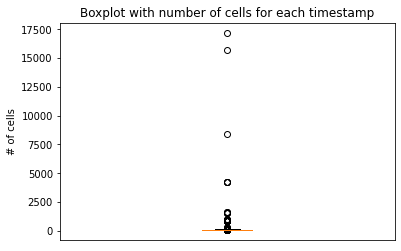

In [19]:
timestamps = []
num_cells_at_time = []
for timestamp, group in grouped_df:
    timestamps.append(timestamp)
    num_cells_at_time.append(len(group))

num_cell_df = pd.DataFrame({'timestamp': timestamps, 'num_cells': num_cells_at_time})
fig = px.line(num_cell_df, x="timestamp", y='num_cells', title='Number of cells for each timestamp')
fig.show()

plt.boxplot(num_cells_at_time);
plt.title('Boxplot with number of cells for each timestamp')
plt.ylabel('# of cells')
plt.xticks([], [])
plt.show()

## Aggregating cells within same sector

### For Hackaton data
The cell_name is of the form 'XX_ija', where:

- XX in {00,01,02,..,30} denotes the site the cell belongs to;
- i in {1,2,3} denotes the sector the cell belongs to;
- j in {1,2,...} denotes the carrier;
- a in {'Z','X','Y','W','V','R','Q','P'} denotes the technology and frequency of the cell based on the table below.

### For Original data
The cell_name is of the form: '{1char}{4digits}{1char}{2chars}', where:

- 1char is Area
- 4digits is range per Area
- 1char is System (frequency/technology)
- 2chars: 1st digit is carrier layer, starting from 1. 2nd digit is sector, range 0-9

In [20]:
df.head()

gid   site  sector  carrier              period_start_time  \
148949     100923  J5002       2        1  2020-01-01T00:00:00.000+01:00   
743142    1974941  J0957       2        2  2020-01-01T00:00:00.000+01:00   
1047598  84392866  J0847       3        1  2020-01-01T00:00:00.000+01:00   
167048    1984992  J2559       3        2  2020-01-01T00:00:00.000+01:00   
143207   84357820  J3205       1        2  2020-01-01T00:00:00.000+01:00   

        day_partition_key cell_hour tech  avail_period_duration  \
148949           20200101         0   4G                     60   
743142           20200101         0   3G                     60   
1047598          20200101         0   4G                     60   
167048           20200101         0   3G                     60   
143207           20200101         0   4G                     60   

         unavail_unplan_nom  ...  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
148949                  0.0  ...         0.0         0.0         0.0   
743142                  0.0  ...         NaN         NaN         NaN   
1047598                 0.0  ...         0.0         0.0       192.0   
167048                  0.0  ...         NaN         NaN         NaN   
143207                  0.0  ...         0.0         0.0      6843.0   

         msdr_nom_s  msdr_nom_d  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  \
148949          0.0         0.0      0.000000e+00    0.000000e+00       0.0   
743142          NaN         NaN      0.000000e+00    0.000000e+00       NaN   
1047598         0.0         0.0      2.314624e+05    2.557074e+09      12.0   
167048          NaN         NaN      0.000000e+00    0.000000e+00       NaN   
143207          2.0         9.0      3.382081e+06    2.466964e+10     297.0   

         ho_nom  timestamp  
148949      0.0 2020-01-01  
743142      NaN 2020-01-01  
1047598     0.0 2020-01-01  
167048      NaN 2020-01-01  
143207      4.0 2020-01-01  

[5 rows x 25 columns]

In [21]:
is_original_data = True
df2 = df.copy()

if not is_original_data:    
    df2['site'] = df2['cell_name'].apply(lambda s: int(s.split('_')[0]))
    df2['sector'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][0]))
    df2['carrier'] = df2['cell_name'].apply(lambda s: int(s.split('_')[1][1]))
    df2['tech'] = df2['cell_name'].apply(lambda s: s.split('_')[1][2])
df2.head()

gid   site  sector  carrier              period_start_time  \
148949     100923  J5002       2        1  2020-01-01T00:00:00.000+01:00   
743142    1974941  J0957       2        2  2020-01-01T00:00:00.000+01:00   
1047598  84392866  J0847       3        1  2020-01-01T00:00:00.000+01:00   
167048    1984992  J2559       3        2  2020-01-01T00:00:00.000+01:00   
143207   84357820  J3205       1        2  2020-01-01T00:00:00.000+01:00   

        day_partition_key cell_hour tech  avail_period_duration  \
148949           20200101         0   4G                     60   
743142           20200101         0   3G                     60   
1047598          20200101         0   4G                     60   
167048           20200101         0   3G                     60   
143207           20200101         0   4G                     60   

         unavail_unplan_nom  ...  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
148949                  0.0  ...         0.0         0.0         0.0   
743142                  0.0  ...         NaN         NaN         NaN   
1047598                 0.0  ...         0.0         0.0       192.0   
167048                  0.0  ...         NaN         NaN         NaN   
143207                  0.0  ...         0.0         0.0      6843.0   

         msdr_nom_s  msdr_nom_d  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  \
148949          0.0         0.0      0.000000e+00    0.000000e+00       0.0   
743142          NaN         NaN      0.000000e+00    0.000000e+00       NaN   
1047598         0.0         0.0      2.314624e+05    2.557074e+09      12.0   
167048          NaN         NaN      0.000000e+00    0.000000e+00       NaN   
143207          2.0         9.0      3.382081e+06    2.466964e+10     297.0   

         ho_nom  timestamp  
148949      0.0 2020-01-01  
743142      NaN 2020-01-01  
1047598     0.0 2020-01-01  
167048      NaN 2020-01-01  
143207      4.0 2020-01-01  

[5 rows x 25 columns]

### Fill NaNs of cells 

In [22]:
agg_df = df2.copy()
for c in nan_columns:
    if is_numeric_dtype(agg_df[c]):
        if c in ['thp_denom_tt_kpi', 'thp_nom_tt_kpi']:
            agg_func = 'mean'
        else:
            agg_func = 'median'
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site', 'sector', 'tech'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site', 'sector'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['timestamp', 'site'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site', 'sector'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df.groupby(['site'])[c].transform(agg_func))
        agg_df[c] = agg_df[c].fillna(agg_df[c].median())

print(agg_df.isna().sum())
agg_df.head()

gid                      0
site                     0
sector                   0
carrier                  0
period_start_time        0
day_partition_key        0
cell_hour                0
tech                     0
avail_period_duration    0
unavail_unplan_nom       0
unavail_unplan_denom     0
unavail_total_nom        0
unavail_total_denom      0
bandwidth                0
mcdr_denom               0
mcdr_nom_s               0
mcdr_nom_d               0
msdr_denom               0
msdr_nom_s               0
msdr_nom_d               0
thp_denom_tt_kpi         0
thp_nom_tt_kpi           0
ho_denom                 0
ho_nom                   0
timestamp                0
dtype: int64


gid   site  sector  carrier              period_start_time  \
148949     100923  J5002       2        1  2020-01-01T00:00:00.000+01:00   
743142    1974941  J0957       2        2  2020-01-01T00:00:00.000+01:00   
1047598  84392866  J0847       3        1  2020-01-01T00:00:00.000+01:00   
167048    1984992  J2559       3        2  2020-01-01T00:00:00.000+01:00   
143207   84357820  J3205       1        2  2020-01-01T00:00:00.000+01:00   

        day_partition_key cell_hour tech  avail_period_duration  \
148949           20200101         0   4G                     60   
743142           20200101         0   3G                     60   
1047598          20200101         0   4G                     60   
167048           20200101         0   3G                     60   
143207           20200101         0   4G                     60   

         unavail_unplan_nom  ...  mcdr_nom_s  mcdr_nom_d  msdr_denom  \
148949                  0.0  ...         0.0         0.0         0.0   
743142                  0.0  ...         0.0         0.0       171.0   
1047598                 0.0  ...         0.0         0.0       192.0   
167048                  0.0  ...         0.0         0.0       624.0   
143207                  0.0  ...         0.0         0.0      6843.0   

         msdr_nom_s  msdr_nom_d  thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  \
148949          0.0         0.0      0.000000e+00    0.000000e+00       0.0   
743142          0.0         0.0      0.000000e+00    0.000000e+00       0.0   
1047598         0.0         0.0      2.314624e+05    2.557074e+09      12.0   
167048          0.0         0.0      0.000000e+00    0.000000e+00       1.0   
143207          2.0         9.0      3.382081e+06    2.466964e+10     297.0   

         ho_nom  timestamp  
148949      0.0 2020-01-01  
743142      0.0 2020-01-01  
1047598     0.0 2020-01-01  
167048      0.0 2020-01-01  
143207      4.0 2020-01-01  

[5 rows x 25 columns]

### Now aggregate across each sector

In [23]:
agg_df.columns

Index(['gid', 'site', 'sector', 'carrier', 'period_start_time',
       'day_partition_key', 'cell_hour', 'tech', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_s',
       'mcdr_nom_d', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom',
       'timestamp'],
      dtype='object')

In [24]:
# To aggregate columns differently, pass this to the agg-function
#aggregate_methods = {
 #   'avail_period_duration': 'mean',
  #  'unavail_unplan_nom': 'mean',
   # 'unavail_unplan_denom': 'mean',
    #'unavail_total_nom': 'mean',
    #'unavail_total_denom': 'mean',
    #'bandwidth': 'mean'
#}

agg_df = agg_df.groupby(['timestamp', 'site', 'sector']).agg('mean').reset_index()
# Remove irrelevant columns 
agg_df.drop(columns=['gid', 'carrier'], inplace=True)
agg_df[(agg_df['site'] == 'J1824') & (agg_df['sector'] == 1)].head()

timestamp   site  sector  avail_period_duration  \
15  2020-01-01 00:00:00  J1824       1                   60.0   
71  2020-01-01 01:00:00  J1824       1                   50.0   
136 2020-01-01 02:00:00  J1824       1                   60.0   
196 2020-01-01 03:00:00  J1824       1                   60.0   
313 2020-01-01 05:00:00  J1824       1                   60.0   

     unavail_unplan_nom  unavail_unplan_denom  unavail_total_nom  \
15                  0.0                  60.0          30.000000   
71                  0.0                  60.0          29.483333   
136                 0.0                  60.0           0.000000   
196                 0.0                  60.0          40.000000   
313                 0.0                  60.0          60.000000   

     unavail_total_denom   bandwidth  mcdr_denom  mcdr_nom_s  mcdr_nom_d  \
15                  60.0  110.000000        29.0         0.0         0.0   
71                  60.0  133.333333        23.5         0.0         0.0   
136                 60.0   20.000000         6.0         0.0         0.0   
196                 60.0  140.000000        29.0         0.0         0.0   
313                 60.0  150.000000         9.0         0.0         0.0   

     msdr_denom  msdr_nom_s  msdr_nom_d  thp_denom_tt_kpi  thp_nom_tt_kpi  \
15       3226.0         2.0         3.0        406028.000    3.870519e+06   
71       3452.5         0.0         0.5       1327349.635    2.499682e+10   
136       734.0         7.0        17.0             0.000    0.000000e+00   
196      3820.5         4.0        12.0        287000.000    3.687960e+07   
313      1477.0         3.0         0.0         24969.500    1.729635e+05   

     ho_denom  ho_nom  
15        1.0     0.0  
71      295.5     0.0  
136       0.0     0.0  
196       0.0     0.0  
313       0.0     0.0

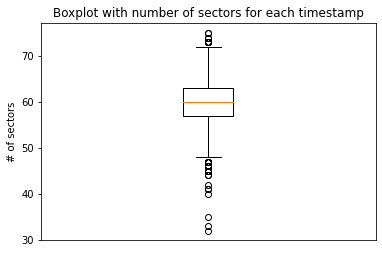

In [25]:
grouped_agg_df = agg_df.groupby(['timestamp'])
timestamps = []
num_sectors_at_time = []
for timestamp, group in grouped_agg_df:
    timestamps.append(timestamp)
    num_sectors_at_time.append(len(group))

num_sector_df = pd.DataFrame({'timestamp': timestamps, 'num_sectors': num_sectors_at_time})
fig = px.line(num_sector_df, x="timestamp", y='num_sectors', hover_data={"timestamp": "|%B %d. %H:%M, %Y"}, title='Number of sectors for each timestamp')
fig.show()


plt.boxplot(num_sectors_at_time);
plt.title('Boxplot with number of sectors for each timestamp')
plt.ylabel('# of sectors')
plt.xticks([], [])
plt.show()

### Visualizing the number of timetamps where the sectors has data

In [26]:
agg_df.head()

timestamp   site  sector  avail_period_duration  unavail_unplan_nom  \
0 2020-01-01  J0614       1                   60.0                 0.0   
1 2020-01-01  J0614       2                   60.0                 0.0   
2 2020-01-01  J0614       3                   60.0                 0.0   
3 2020-01-01  J0847       1                   60.0                 0.0   
4 2020-01-01  J0847       2                   60.0                 0.0   

   unavail_unplan_denom  unavail_total_nom  unavail_total_denom  bandwidth  \
0                  60.0                0.0                 60.0       20.0   
1                  60.0                0.0                 60.0       20.0   
2                  60.0                0.0                 60.0       20.0   
3                  60.0               60.0                 60.0      200.0   
4                  60.0               15.0                 60.0       92.5   

   mcdr_denom  mcdr_nom_s  mcdr_nom_d  msdr_denom  msdr_nom_s  msdr_nom_d  \
0        6.00         0.0         0.0     1665.50        1.00         1.0   
1        4.00         0.0         0.0     1254.00        0.00         0.0   
2        2.00         0.0         0.0      565.00        0.00         0.0   
3        0.75         0.0         0.0      388.75        0.75         2.0   
4        0.50         0.0         0.0      484.50        1.50         4.0   

   thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  
0          0.000000    0.000000e+00       9.0     0.0  
1          0.000000    0.000000e+00       5.0     0.0  
2          0.000000    0.000000e+00       3.0     0.0  
3     252826.742500    2.861316e+09      35.5     0.0  
4     321374.506875    3.652706e+09      40.0     0.0

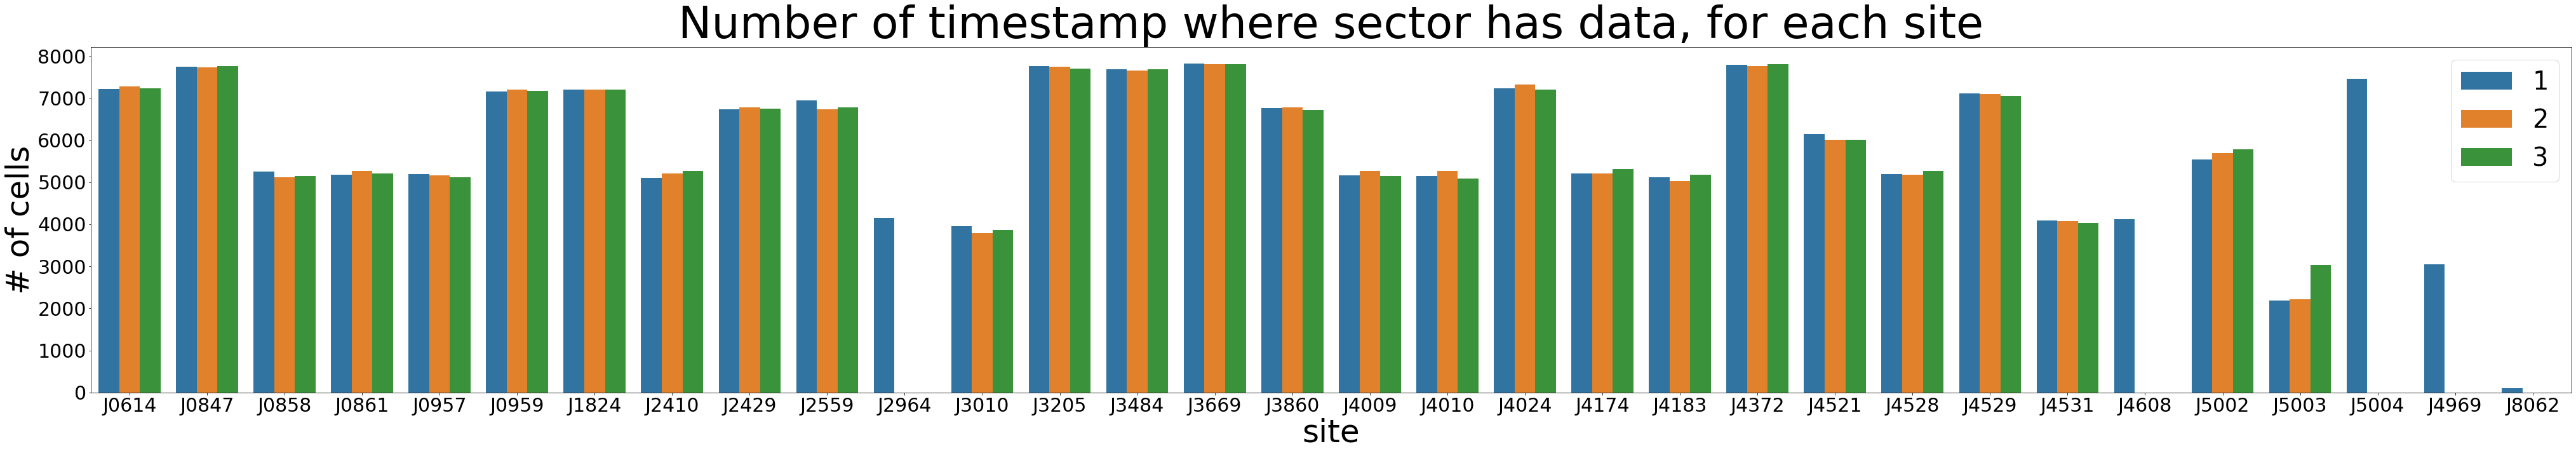

In [27]:
plt.figure(figsize=(70, 10))
ax = sns.countplot(x="site", hue="sector", data=agg_df)
plt.legend(loc='upper right', fontsize=40)
ax.set_ylabel('# of cells', fontsize=50)
ax.xaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of timestamp where sector has data, for each site', fontsize=70)
plt.show()

In [28]:
# Removing sites without exactly three sectors 
agg_df = agg_df[~agg_df['site'].isin(['J2964', 'J4608', 'J5004', 'J4969', 'J8062'])]

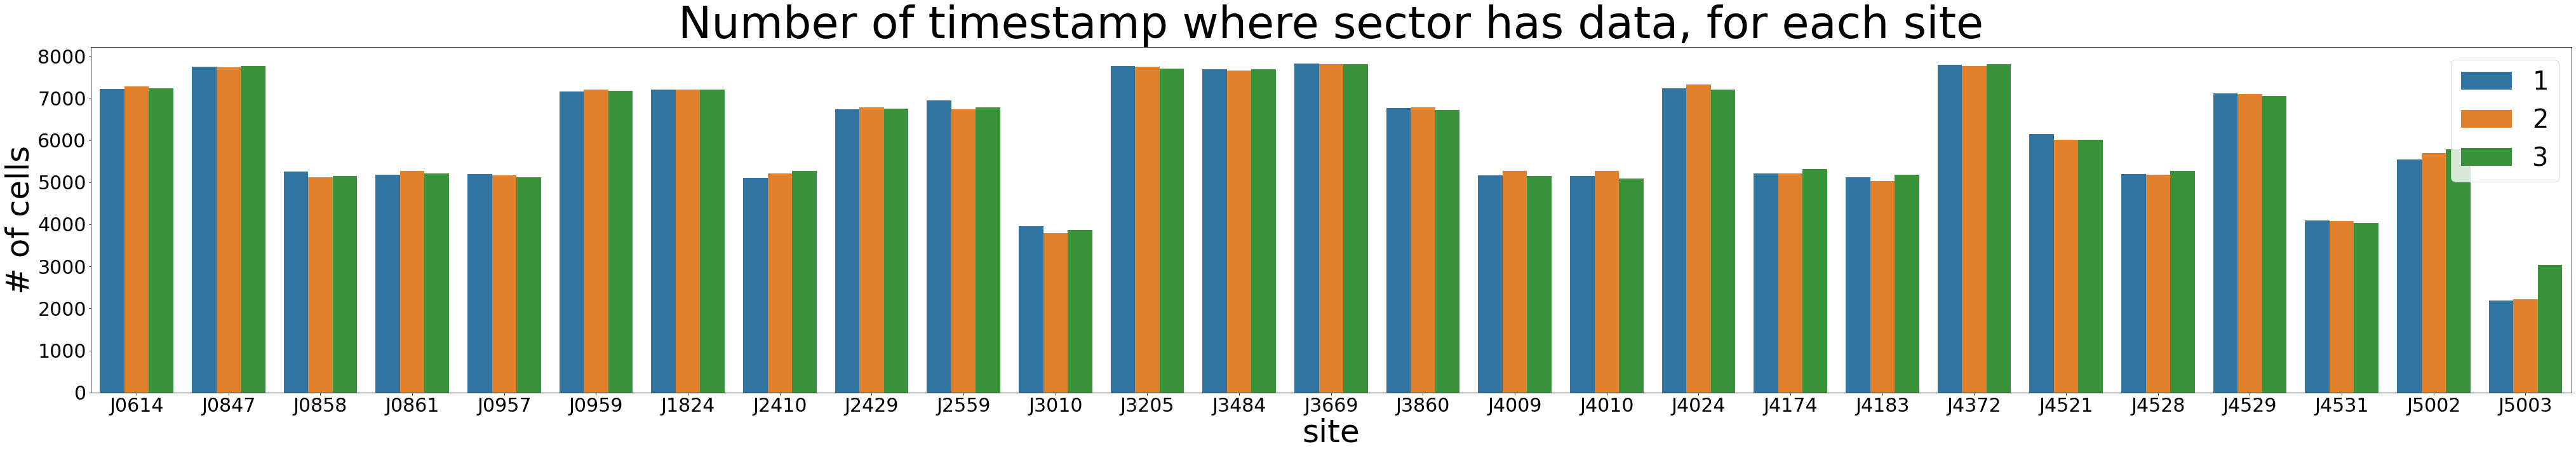

In [29]:
plt.figure(figsize=(70, 10))
ax = sns.countplot(x="site", hue="sector", data=agg_df)
plt.legend(loc='upper right', fontsize=40)
ax.set_ylabel('# of cells', fontsize=50)
ax.xaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of timestamp where sector has data, for each site', fontsize=70)
plt.show()

### Visualizing data for one of the sectors

In [30]:
def visualize_sector(df, site, sector, column):
    if sector is not None:
        sector_df = df[(df['site'] == site) & (df['sector'] == sector)]
    else:
        sector_df = df[(df['site'] == site)]
    fig = px.line(sector_df, x="timestamp", y=column)
    fig.show()

In [31]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_s',
       'mcdr_nom_d', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom'],
      dtype='object')

In [32]:
visualize_sector(agg_df, 'J0847', 1, 'avail_period_duration')

## Creating dataset 
In **agg_df**, each row corresponds to aggregated data from all cells within a sector, at a specific timestamp. However, not all sectors do have at least one active cell at all timestamps. If a sector contains no active cells for a timestamp, then a row for that sector at that timestamp does not exist. To make the resolution (every hour) and shape (there is a row for all sectors for all timestamps) consistent, we must insert rows. 

In [33]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_s',
       'mcdr_nom_d', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom'],
      dtype='object')

In [37]:
default_values = {
    'avail_period_duration': 60, # maybe exclude
    'unavail_unplan_nom': 0,  # maybe exclude
    'unavail_unplan_denom': 60, # maybe exclude
    'unavail_total_nom': 0, # maybe maybe exclude
    'unavail_total_denom': 60,# maybe maybe exclude
    'bandwidth': 0, # gets set to max of sector # maybe exclude
    'mcdr_denom': 0, 
    'mcdr_nom_s': 0,
    'mcdr_nom_d': 0,
    'msdr_denom': 0, 
    'msdr_nom_s': 0,
    'msdr_nom_d': 0,
    'thp_denom_tt_kpi': 0, # gets set to max of sector
    'thp_nom_tt_kpi': 0,
    'ho_denom': 0,
    'ho_nom': 0
}

# change thp, ho, msdr, mcdr to rates 

sector_bandwidth_max = agg_df.groupby(['site', 'sector']).agg('max')['bandwidth'].to_dict()
sector_thp_denom_max = agg_df.groupby(['site', 'sector']).agg('max')['thp_denom_tt_kpi'].to_dict()
# default_values_list = [default_values[c] for c in agg_df.columns[3:]]

In [38]:
is_present_set = set([tuple(x) for x in agg_df[['timestamp', 'site', 'sector']].values])

In [39]:
agg_df.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_s',
       'mcdr_nom_d', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom'],
      dtype='object')

In [40]:
datetime_start = agg_df.head(1)['timestamp'].iloc[0]
datetime_end = agg_df.tail(1)['timestamp'].iloc[0]

all_timestamps = pd.date_range(datetime_start, datetime_end, freq="H")
all_sites = agg_df['site'].unique()
all_sectors = agg_df['sector'].unique()

rows_to_add = []
for timestamp in tqdm(all_timestamps):
    for site in all_sites:
        for sector in all_sectors:
            if (timestamp, site, sector) not in is_present_set:
                bandwidth_default = sector_bandwidth_max[(site, sector)]
                thp_default = sector_thp_denom_max[(site, sector)]
                default_values['bandwidth'] = bandwidth_default
                default_values['thp_denom_tt_kpi'] = thp_default
                default_values_list = [default_values[c] for c in agg_df.columns[3:]]
                row_insert = [timestamp, site, sector]
                row_insert.extend(default_values_list)
                rows_to_add.append(row_insert)

In [41]:
rows_to_add_df = pd.DataFrame(rows_to_add, columns=agg_df.columns)

In [42]:
agg_df_filled = agg_df.append(rows_to_add_df)
agg_df_filled = agg_df_filled.sort_values(by=['timestamp', 'site', 'sector'])

In [43]:
print(agg_df_filled.shape)
agg_df_filled.head(6)

(690768, 19)


timestamp   site  sector  avail_period_duration  unavail_unplan_nom  \
0 2020-01-01  J0614       1                   60.0                 0.0   
1 2020-01-01  J0614       2                   60.0                 0.0   
2 2020-01-01  J0614       3                   60.0                 0.0   
3 2020-01-01  J0847       1                   60.0                 0.0   
4 2020-01-01  J0847       2                   60.0                 0.0   
5 2020-01-01  J0847       3                   60.0                30.0   

   unavail_unplan_denom  unavail_total_nom  unavail_total_denom  bandwidth  \
0                  60.0                0.0                 60.0       20.0   
1                  60.0                0.0                 60.0       20.0   
2                  60.0                0.0                 60.0       20.0   
3                  60.0               60.0                 60.0      200.0   
4                  60.0               15.0                 60.0       92.5   
5                  60.0               30.0                 60.0       35.0   

   mcdr_denom  mcdr_nom_s  mcdr_nom_d  msdr_denom  msdr_nom_s  msdr_nom_d  \
0        6.00         0.0         0.0     1665.50        1.00         1.0   
1        4.00         0.0         0.0     1254.00        0.00         0.0   
2        2.00         0.0         0.0      565.00        0.00         0.0   
3        0.75         0.0         0.0      388.75        0.75         2.0   
4        0.50         0.0         0.0      484.50        1.50         4.0   
5        1.00         0.0         0.0      192.00        0.00         0.0   

   thp_denom_tt_kpi  thp_nom_tt_kpi  ho_denom  ho_nom  
0          0.000000    0.000000e+00       9.0     0.0  
1          0.000000    0.000000e+00       5.0     0.0  
2          0.000000    0.000000e+00       3.0     0.0  
3     252826.742500    2.861316e+09      35.5     0.0  
4     321374.506875    3.652706e+09      40.0     0.0  
5     115731.213750    1.278537e+09      12.0     0.0

#### Check that new dataframe now has constant number of sectors for each timestamp

In [44]:
grouped_agg_df = agg_df_filled.groupby(['timestamp'])
timestamps = []
num_sectors_at_time = []
for timestamp, group in grouped_agg_df:
    timestamps.append(timestamp)
    num_sectors_at_time.append(len(group))

num_sector_df = pd.DataFrame({'timestamp': timestamps, 'num_sectors': num_sectors_at_time})
fig = px.line(num_sector_df, x="timestamp", y='num_sectors', hover_data={"timestamp": "|%B %d. %H:%M, %Y"}, title='Number of sectors for each timestamp')
fig.show()

#### Visualize column again

In [45]:
agg_df_filled.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'unavail_total_nom',
       'unavail_total_denom', 'bandwidth', 'mcdr_denom', 'mcdr_nom_s',
       'mcdr_nom_d', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d',
       'thp_denom_tt_kpi', 'thp_nom_tt_kpi', 'ho_denom', 'ho_nom'],
      dtype='object')

In [65]:
# Cols to keep:
cols_to_keep = ['timestamp', 'site', 'sector', 'avail_period_duration', 'unavail_unplan_nom', 'unavail_unplan_denom', 'mcdr_denom', 'msdr_denom', 'msdr_nom_s', 'msdr_nom_d', 'ho_denom', 'ho_nom']

In [74]:
visualize_sector(agg_df, 'J0847', 1, 'mcdr_denom')

# Group Sectors Into the Final Dataset
## Alternative 1: 
Group the data to get a series of graph signals with shape: (# of timestamps, # of sectors, # of features), see figure below: <img src="https://i.imgur.com/1izToWi.png" width=750 height=750 />.

In [50]:
def save_metadata(df, path):
    metadata = {
    'start': str(df.head(1)['timestamp'].iloc[0]),
    'end': str(df.tail(1)['timestamp'].iloc[0]),
    'resolution_minutes': (df.iloc[1, 0] - df.iloc[0, 0]).seconds / 60,
    'columns': df.columns.tolist()}
    
    with open(path, 'w') as file:
        json.dump(metadata, file, indent=2)

In [51]:
grouped_agg_df = agg_df_filled.groupby(['timestamp'])
graph_signals = []

for timestamp, group in tqdm(grouped_agg_df):
    graph_signals.append(group)

graph_signals = np.array(graph_signals)

In [53]:
print(graph_signals.shape)
save = False
save_path = '../datasets/telenor/'
os.makedirs(save_path, exist_ok=True)

if save:
    save_metadata(agg_df_filled, f'{save_path}/graph_signals_metadata.txt') 
    np.save(f'{save_path}/graph_signals.npy', graph_signals)

(8528, 81, 19)


## Alternative 2: 
'Augment' each sector with the sectors of the same site. 

In [66]:
print(agg_df_filled.shape)
agg_df_filled.columns

(690768, 12)


Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'mcdr_denom',
       'msdr_denom', 'msdr_nom_s', 'msdr_nom_d', 'ho_denom', 'ho_nom'],
      dtype='object')

In [67]:
# Reduce number of cols
agg_df_filled = agg_df_filled[cols_to_keep]
agg_df_filled.columns

Index(['timestamp', 'site', 'sector', 'avail_period_duration',
       'unavail_unplan_nom', 'unavail_unplan_denom', 'mcdr_denom',
       'msdr_denom', 'msdr_nom_s', 'msdr_nom_d', 'ho_denom', 'ho_nom'],
      dtype='object')

In [68]:
site_grouped = agg_df_filled.groupby(['site', 'timestamp'])
sectors_df = []

for (site, timestamp), group in tqdm(site_grouped):
    # Merge the three sectors
    group = group.drop(columns=['sector'])
    s1, s2, s3 = group.iloc[0, :], group.iloc[1, :], group.iloc[2, :]

    sectors_comb = {}
    sectors_comb['timestamp'] =  str(timestamp)
    sectors_comb['site'] = site

    for i, s in enumerate([s1, s2, s3], start=1):
        for c in group.columns[2:]:
            sectors_comb[f'{c}_{i}'] = s[c]
    
    sectors_df.append(sectors_comb)

sectors_df = pd.DataFrame(sectors_df, index=range(len(sectors_df)))
sectors_df['timestamp'] = pd.to_datetime(sectors_df['timestamp'])
sectors_df = sectors_df.sort_values(by=['site', 'timestamp'])
display(sectors_df.head())

timestamp   site  avail_period_duration_1  unavail_unplan_nom_1  \
0 2020-01-01 00:00:00  J0614                     60.0                   0.0   
1 2020-01-01 01:00:00  J0614                     60.0                   0.0   
2 2020-01-01 02:00:00  J0614                     60.0                   0.0   
3 2020-01-01 03:00:00  J0614                     60.0                   0.0   
4 2020-01-01 04:00:00  J0614                     60.0                   0.0   

   unavail_unplan_denom_1  mcdr_denom_1  msdr_denom_1  msdr_nom_s_1  \
0                    60.0           6.0        1665.5           1.0   
1                    60.0         104.0        2716.0           2.0   
2                    60.0           6.0        1665.5           1.0   
3                    60.0           6.0        1665.5           1.0   
4                    60.0           0.0           0.0           0.0   

   msdr_nom_d_1  ho_denom_1  ...  ho_nom_2  avail_period_duration_3  \
0           1.0         9.0  ...       0.0                     60.0   
1           5.0         2.0  ...       0.0                     60.0   
2           1.0         9.0  ...       0.0                     60.0   
3           1.0         9.0  ...       0.0                     60.0   
4           0.0         0.0  ...       0.0                     60.0   

   unavail_unplan_nom_3  unavail_unplan_denom_3  mcdr_denom_3  msdr_denom_3  \
0                   0.0                    60.0           2.0         565.0   
1                   0.0                    60.0         104.0        2716.0   
2                   0.0                    60.0           2.0         565.0   
3                   0.0                    60.0           2.0         565.0   
4                   0.0                    60.0           0.0           0.0   

   msdr_nom_s_3  msdr_nom_d_3  ho_denom_3  ho_nom_3  
0           0.0           0.0         3.0       0.0  
1           2.0           5.0         2.0       0.0  
2           0.0           0.0         3.0       0.0  
3           0.0           0.0         3.0       0.0  
4           0.0           0.0         0.0       0.0  

[5 rows x 29 columns]

In [69]:
visualize_sector(sectors_df, 'J0847', None, 'mcdr_denom_3')

In [71]:
print(sectors_df.shape)
save = True
save_path = '../datasets/telenor/site_data/vol2'
os.makedirs(save_path, exist_ok=True)
if save:
    save_metadata(sectors_df, f'{save_path}/metadata.txt') 
    grouped_sectors_df = sectors_df.groupby('site')
    for site, group in grouped_sectors_df:
        np.save(f'{save_path}/{site}.npy', group.values)

(230256, 29)
